In [1]:
import numpy as np
import pandas as pd
from pandas import option_context
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', None)

from models import LogisticRegression
from ml_utils import optim_data, optim_bench, models_summary, diagnostic
from solvers_utils import logistic, logistic_der, f_and_df

C:\Users\Utente\AppData\Local\Temp\ipykernel_2380\2195792076.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Load datasets

## Synthetic dataset

In [2]:
X_train_syn = pd.read_csv("datasets/synthetic/syn_X_train.csv").values
y_train_syn = pd.read_csv("datasets/synthetic/syn_y_train.csv").values.reshape(-1)
X_test_syn = pd.read_csv("datasets/synthetic/syn_X_test.csv").values
y_test_syn = pd.read_csv("datasets/synthetic/syn_y_test.csv").values.reshape(-1)

print(f"""
Apple quality dataset
X_train = {X_train_syn.shape}, y_train = {y_train_syn.shape}
X_test = {X_test_syn.shape}, y_test = {y_test_syn.shape}""")


Apple quality dataset
X_train = (4000, 11), y_train = (4000,)
X_test = (1000, 11), y_test = (1000,)


In [3]:
w0Syn = (2 + 2) * np.random.default_rng(42).random(11) - 2

In [4]:
benchSyn1 = LogisticRegression(C=1).fit(w0Syn, X_train_syn, y_train_syn, X_test_syn, y_test_syn)
benchSyn2 = LogisticRegression(C=1, solver="Newton-CG").fit(w0Syn, X_train_syn, y_train_syn, X_test_syn, y_test_syn)
benchSyn3 = LogisticRegression(C=1, solver="CG").fit(w0Syn, X_train_syn, y_train_syn, X_test_syn, y_test_syn)

benchSyn_data = optim_bench([benchSyn1, benchSyn2, benchSyn3])

## Apple quality dataset

In [2]:
X_train_apple = pd.read_csv("datasets/apple_quality/apple_X_train.csv").values
y_train_apple = pd.read_csv("datasets/apple_quality/apple_y_train.csv").values.reshape(-1)
X_test_apple = pd.read_csv("datasets/apple_quality/apple_X_test.csv").values
y_test_apple = pd.read_csv("datasets/apple_quality/apple_y_test.csv").values.reshape(-1)

print(f"""
Apple quality dataset
X_train = {X_train_apple.shape}, y_train = {y_train_apple.shape}
X_test = {X_test_apple.shape}, y_test = {y_test_apple.shape}""")


Apple quality dataset
X_train = (3200, 8), y_train = (3200,)
X_test = (800, 8), y_test = (800,)


In [3]:
w0Apple = (2 + 2) * np.random.default_rng(42).random(8) - 2

In [4]:
benchApple1 = LogisticRegression(C=1).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple)
benchApple2 = LogisticRegression(C=1, solver="Newton-CG").fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple)
benchApple3 = LogisticRegression(C=1, solver="CG").fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple)

benchApple_data = optim_bench([benchApple1, benchApple2, benchApple3])

## Cars purchaising dataset

In [2]:
X_train_car = pd.read_csv("datasets/cars/car_X_train.csv").values
y_train_car = pd.read_csv("datasets/cars/car_y_train.csv").values.reshape(-1)
X_test_car = pd.read_csv("datasets/cars/car_X_test.csv").values
y_test_car = pd.read_csv("datasets/cars/car_y_test.csv").values.reshape(-1)

print(f"""
Cars purchaising dataset
X_train = {X_train_car.shape}, y_train = {y_train_car.shape}
X_test = {X_test_car.shape}, y_test = {y_test_car.shape}""")


Cars purchaising dataset
X_train = (754, 4), y_train = (754,)
X_test = (189, 4), y_test = (189,)


In [3]:
w0Car = (2 + 2) * np.random.default_rng(42).random(4) - 2

In [4]:
benchCar1 = LogisticRegression(C=1).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car)
benchCar2 = LogisticRegression(C=1, solver="Newton-CG").fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car)
benchCar3 = LogisticRegression(C=1, solver="CG").fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car)

benchCar_data = optim_bench([benchCar1, benchCar2, benchCar3])

## Loan eligibility dataset

In [3]:
X_train_loan = pd.read_csv("datasets/loan_data/loan_X_train.csv").values
y_train_loan = pd.read_csv("datasets/loan_data/loan_y_train.csv").values.reshape(-1)
X_test_loan = pd.read_csv("datasets/loan_data/loan_X_test.csv").values
y_test_loan = pd.read_csv("datasets/loan_data/loan_y_test.csv").values.reshape(-1)

print(f"""
Loan eligibility dataset
X_train = {X_train_loan.shape}, y_train = {y_train_loan.shape}
X_test = {X_test_loan.shape}, y_test = {y_test_loan.shape}""")


Loan eligibility dataset
X_train = (384, 12), y_train = (384,)
X_test = (96, 12), y_test = (96,)


In [4]:
w0Loan = (1.5 + 1.5) * np.random.default_rng(42).random(12) - 1.5

In [6]:
benchLoan1 = LogisticRegression(C=1).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan)
benchLoan2 = LogisticRegression(C=1, solver="Newton-CG").fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan)
benchLoan3 = LogisticRegression(C=1, solver="CG").fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan)

benchLoan_data = optim_bench([benchLoan1, benchLoan2, benchLoan3])

## HR score dataset

In [2]:
X_train_hr = pd.read_csv("datasets/hr_score/hr_X_train.csv").values
y_train_hr = pd.read_csv("datasets/hr_score/hr_y_train.csv").values.reshape(-1)
X_test_hr = pd.read_csv("datasets/hr_score/hr_X_test.csv").values
y_test_hr = pd.read_csv("datasets/hr_score/hr_y_test.csv").values.reshape(-1)

print(f"""
HR score dataset
X_train = {X_train_hr.shape}, y_train = {y_train_hr.shape}
X_test = {X_test_hr.shape}, y_test = {y_test_hr.shape}""")


HR score dataset
X_train = (240, 10), y_train = (240,)
X_test = (60, 10), y_test = (60,)


In [3]:
w0HR = (2 + 2) * np.random.default_rng(42).random(10) - 2

In [4]:
benchHR1 = LogisticRegression(C=1).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr)
benchHR2 = LogisticRegression(C=1, solver="Newton-CG").fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr)
benchHR3 = LogisticRegression(C=1, solver="CG").fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr)

benchHR_data = optim_bench([benchHR1, benchHR2, benchHR3])

## Bank churn dataset

In [2]:
X_train_bank = pd.read_csv("datasets/bank_churn/bank_X_train.csv").values
y_train_bank = pd.read_csv("datasets/bank_churn/bank_y_train.csv").values.reshape(-1)
X_test_bank = pd.read_csv("datasets/bank_churn/bank_X_test.csv").values
y_test_bank = pd.read_csv("datasets/bank_churn/bank_y_test.csv").values.reshape(-1)

print(f"""
Bank churn dataset
X_train = {X_train_bank.shape}
X_test = {X_test_bank.shape}""")


Bank churn dataset
X_train = (8000, 11)
X_test = (2000, 11)


In [3]:
w0Bank = (1.5 + 1.5) * np.random.default_rng(42).random(11) - 1.5

In [4]:
benchBank1 = LogisticRegression(C=1).fit(w0Bank, X_train_bank, y_train_bank, X_test_bank, y_test_bank)
benchBank2 = LogisticRegression(C=1, solver="Newton-CG").fit(w0Bank, X_train_bank, y_train_bank, X_test_bank, y_test_bank)
benchBank3 = LogisticRegression(C=1, solver="CG").fit(w0Bank, X_train_bank, y_train_bank, X_test_bank, y_test_bank)

benchBank_data = optim_bench([benchBank1, benchBank2, benchBank3])

## Breast cancer dataset

In [3]:
X_train_breast = pd.read_csv("datasets/breast_cancer/breast_X_train.csv").values
y_train_breast = pd.read_csv("datasets/breast_cancer/breast_y_train.csv").values.reshape(-1)
X_test_breast = pd.read_csv("datasets/breast_cancer/breast_X_test.csv").values
y_test_breast = pd.read_csv("datasets/breast_cancer/breast_y_test.csv").values.reshape(-1)

print(f"""
Breast cancer dataset
X_train = {X_train_breast.shape}, y_train = {y_train_breast.shape}
X_test = {X_test_breast.shape}, y_test = {y_test_breast.shape}""")


Breast cancer dataset
X_train = (455, 31), y_train = (455,)
X_test = (114, 31), y_test = (114,)


In [4]:
w0Breast = (1.5 + 1.5) * np.random.default_rng(42).random(31) - 1.5

In [5]:
benchBreast1 = LogisticRegression(C=1).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast)
benchBreast2 = LogisticRegression(C=1, solver="Newton-CG").fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast)
benchBreast3 = LogisticRegression(C=1, solver="CG").fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast)

benchBreast_data = optim_bench([benchBreast1, benchBreast2, benchBreast3])

## Heart attack dataset

In [2]:
X_train_heart = pd.read_csv("datasets/heart_attack/heart_X_train.csv").values
y_train_heart = pd.read_csv("datasets/heart_attack/heart_y_train.csv").values.reshape(-1)
X_test_heart = pd.read_csv("datasets/heart_attack/heart_X_test.csv").values
y_test_heart = pd.read_csv("datasets/heart_attack/heart_y_test.csv").values.reshape(-1)

print(f"""
Heart attack dataset
X_train = {X_train_heart.shape}, y_train = {y_train_heart.shape}
X_test = {X_test_heart.shape}, y_test = {y_test_heart.shape}""")


Heart attack dataset
X_train = (241, 14), y_train = (241,)
X_test = (61, 14), y_test = (61,)


In [3]:
w0Heart = (1.5 + 1.5) * np.random.default_rng(42).random(14) - 1.5

In [4]:
benchHeart1 = LogisticRegression(C=1).fit(w0Heart, X_train_heart, y_train_heart, X_test_heart, y_test_heart)
benchHeart2 = LogisticRegression(C=1, solver="Newton-CG").fit(w0Heart, X_train_heart, y_train_heart, X_test_heart, y_test_heart)
benchHeart3 = LogisticRegression(C=1, solver="CG").fit(w0Heart, X_train_heart, y_train_heart, X_test_heart, y_test_heart)

benchHeart_data = optim_bench([benchHeart1, benchHeart2, benchHeart3])

## Diabetes dataset

In [2]:
X_train_diab = pd.read_csv("datasets/diabetes/diab_X_train.csv").values
y_train_diab = pd.read_csv("datasets/diabetes/diab_y_train.csv").values.reshape(-1)
X_test_diab = pd.read_csv("datasets/diabetes/diab_X_test.csv").values
y_test_diab = pd.read_csv("datasets/diabetes/diab_y_test.csv").values.reshape(-1)

print(f"""
Diabetes dataset
X_train = {X_train_diab.shape}, y_train = {y_train_diab.shape}
X_test = {X_test_diab.shape}, y_test = {y_test_diab.shape}""")


Diabetes dataset
X_train = (595, 9), y_train = (595,)
X_test = (149, 9), y_test = (149,)


In [3]:
w0Diab = (1.5 + 1.5) * np.random.default_rng(42).random(9) - 1.5

In [4]:
benchDiab1 = LogisticRegression(C=1).fit(w0Diab, X_train_diab, y_train_diab, X_test_diab, y_test_diab)
benchDiab2 = LogisticRegression(C=1, solver="Newton-CG").fit(w0Diab, X_train_diab, y_train_diab, X_test_diab, y_test_diab)
benchDiab3 = LogisticRegression(C=1, solver="CG").fit(w0Diab, X_train_diab, y_train_diab, X_test_diab, y_test_diab)

benchDiab_data = optim_bench([benchDiab1, benchDiab2, benchDiab3])

# Synthetic dataset

In [5]:
sgdSyn_fixed1 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=32).fit(w0Syn, X_train_syn, y_train_syn, X_test_syn, y_test_syn, step_size=0.5)
sgdSyn_fixed2 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=32).fit(w0Syn, X_train_syn, y_train_syn, X_test_syn, y_test_syn, step_size=0.01)

In [6]:
sgdSyn_decre1 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=32).fit(w0Syn, X_train_syn, y_train_syn, X_test_syn, y_test_syn, step_size=1)
sgdSyn_decre2 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=32).fit(w0Syn, X_train_syn, y_train_syn, X_test_syn, y_test_syn, step_size=0.1)

In [7]:
sgdmSyn1 = LogisticRegression(solver="SGDM", C=1, minibatch=32).fit(w0Syn, X_train_syn, y_train_syn, X_test_syn, y_test_syn, step_size=1, momentum=0.9)
sgdmSyn2 = LogisticRegression(solver="SGDM", C=1, minibatch=32).fit(w0Syn, X_train_syn, y_train_syn, X_test_syn, y_test_syn, step_size=0.1, momentum=0.9)

In [8]:
sgdSyn_armijo1 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=32).fit(w0Syn, X_train_syn, y_train_syn, X_test_syn, y_test_syn, step_size=1)
sgdSyn_armijo2 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=32).fit(w0Syn, X_train_syn, y_train_syn, X_test_syn, y_test_syn, step_size=0.1)

mslcSyn1 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=32).fit(w0Syn, X_train_syn, y_train_syn, X_test_syn, y_test_syn, step_size=1, momentum=0.9)
mslcSyn2 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=32).fit(w0Syn, X_train_syn, y_train_syn, X_test_syn, y_test_syn, step_size=0.1, momentum=0.9)

mslrSyn1 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=32).fit(w0Syn, X_train_syn, y_train_syn, X_test_syn, y_test_syn, step_size=1, momentum=0.9)
mslrSyn2 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=32).fit(w0Syn, X_train_syn, y_train_syn, X_test_syn, y_test_syn, step_size=0.1, momentum=0.9)

In [9]:
modelsSyn_data = optim_data([sgdSyn_fixed1, sgdSyn_fixed2, sgdSyn_decre1, sgdSyn_decre2, sgdmSyn1, sgdmSyn2,
                             sgdSyn_armijo1, sgdSyn_armijo2, mslcSyn1, mslcSyn2, mslrSyn1, mslrSyn2])

## Summary

In [10]:
models_summary(modelsSyn_data, benchSyn_data)

,Solver,C,Minibatch,Step-size,Momentum,Loss,Grad norm,Run-time,Iterations,Train accuracy,Test accuracy,Distance (L-BFGS)
0,L-BFGS,1,NaN,NaN,NaN,1339.457982,0.079935,NaN,15,0.86225,0.882,0.000000
1,Newton-CG,1,NaN,NaN,NaN,1339.457931,0.005946,NaN,11,0.86225,0.882,0.009562
2,CG,1,NaN,NaN,NaN,1339.457931,0.000010,NaN,30,0.86225,0.882,0.009369
3,SGD-Fixed,1,32.0,0.50,0.0,2135.844154,1457.445297,0.497827,200,0.84425,0.852,1.617901
4,SGD-Fixed,1,32.0,0.01,0.0,2125.507396,1434.779432,0.616765,200,0.86225,0.881,1.612940
5,SGD-Decreasing,1,32.0,1.00,0.0,2122.357089,1430.122991,0.541770,200,0.86125,0.883,1.610723
6,SGD-Decreasing,1,32.0,0.10,0.0,2121.326489,1428.592248,0.474881,200,0.86075,0.883,1.609980
7,SGDM,1,32.0,1.00,0.9,2127.668750,1438.911020,0.522250,200,0.85875,0.876,1.614198
8,SGDM,1,32.0,0.10,0.9,2120.918882,1427.987118,0.462894,200,0.86125,0.882,1.609727
9,SGD-Armijo,1,32.0,1.00,0.0,1999.725487,1253.762850,11.431011,200,0.84675,0.856,1.516284


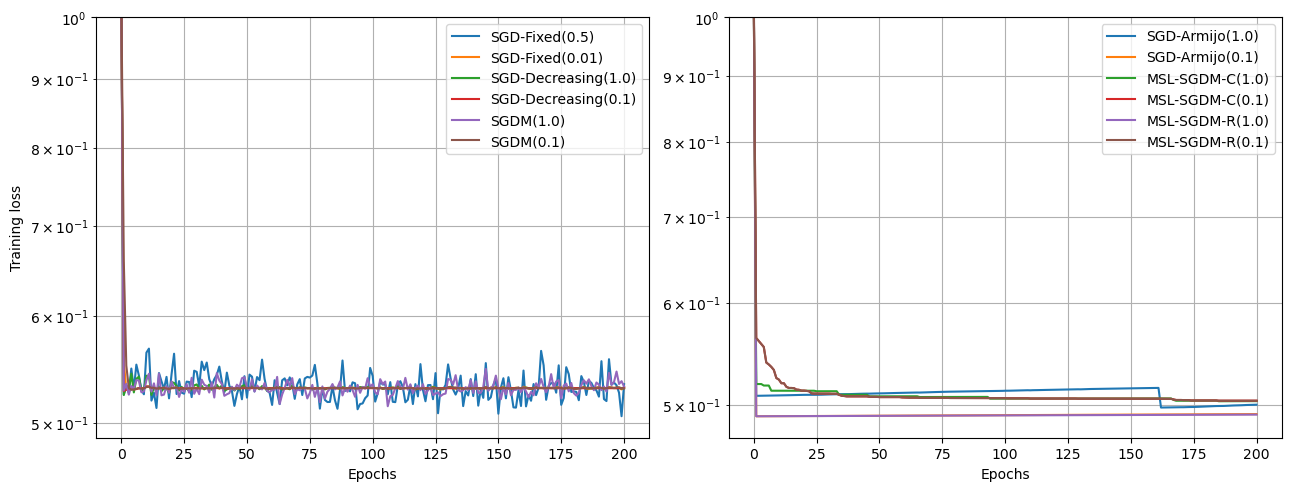

In [11]:
diagnostic(modelsSyn_data)

# Apple quality dataset

In [5]:
# SGD-Fixed
sgdApple_fixed1 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=1)
sgdApple_fixed2 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.1)
sgdApple_fixed3 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.01)

In [6]:
# SGD-Decreasing
sgdApple_decre1 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=1)
sgdApple_decre2 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.1)
sgdApple_decre3 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.05)

In [8]:
# SGDM
sgdmApple1 = LogisticRegression(solver="SGDM", C=1, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=1, momentum=0.9)
sgdmApple2 = LogisticRegression(solver="SGDM", C=1, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.1, momentum=0.9)
sgdmApple3 = LogisticRegression(solver="SGDM", C=1, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.01, momentum=0.9)

In [7]:
# SGD-Armijo
sgdApple_armijo1 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=1)
sgdApple_armijo2 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.5)
sgdApple_armijo3 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.1)

In [9]:
# MSL-SGDM-C
mslcApple1 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=1, momentum=0.9)
mslcApple2 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.1, momentum=0.9)
mslcApple3 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.01, momentum=0.9)

In [10]:
# MSL-SGDM-R
mslrApple1 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=1, momentum=0.9)
mslrApple2 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.1, momentum=0.9)
mslrApple3 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=32).fit(w0Apple, X_train_apple, y_train_apple, X_test_apple, y_test_apple, step_size=0.01, momentum=0.9)

In [11]:
modelsApple_data = optim_data([sgdApple_fixed1, sgdApple_fixed2, sgdApple_fixed3, sgdApple_decre1, sgdApple_decre2, sgdApple_decre3, sgdmApple1, sgdmApple2, sgdmApple3,
                               sgdApple_armijo1, sgdApple_armijo2, sgdApple_armijo3, mslcApple1, mslcApple2, mslcApple3, mslrApple1, mslrApple2, mslrApple3])
#modelsApple_data[["Solver", "Step-size", "Loss"]].sort_values(by="Loss")

## Summary

In [19]:
models_summary(modelsApple_data, benchApple_data).sort_values(by="Loss")

,Solver,C,Minibatch,Step-size,Momentum,Loss,Grad norm,Run-time,Iterations,Train accuracy,Test accuracy,Distance (L-BFGS)
2,CG,1,NaN,NaN,NaN,1644.496101,0.000010,NaN,17,0.745313,0.75375,0.002482
1,Newton-CG,1,NaN,NaN,NaN,1644.496101,0.003009,NaN,11,0.745313,0.75375,0.002482
0,L-BFGS,1,NaN,NaN,NaN,1644.496774,0.712087,NaN,8,0.745313,0.75375,0.000000
12,SGD-Armijo,1,32.0,1.00,0.0,1978.264037,566.325246,7.922965,200,0.706250,0.71875,1.688026
13,SGD-Armijo,1,32.0,0.50,0.0,1998.398427,525.244528,7.532205,200,0.642813,0.66875,1.808718
19,MSL-SGDM-R,1,32.0,0.10,0.9,2004.254750,552.271772,7.464999,200,0.707187,0.72125,1.770242
15,MSL-SGDM-C,1,32.0,1.00,0.9,2005.901261,538.733347,7.921956,200,0.696250,0.71875,1.811027
14,SGD-Armijo,1,32.0,0.10,0.0,2008.605875,541.775266,7.919608,200,0.698750,0.71875,1.819549
18,MSL-SGDM-R,1,32.0,1.00,0.9,2009.426295,547.085075,7.793905,200,0.705313,0.72500,1.815303
17,MSL-SGDM-C,1,32.0,0.01,0.9,2022.377999,597.439643,7.951125,200,0.694688,0.69000,1.759066


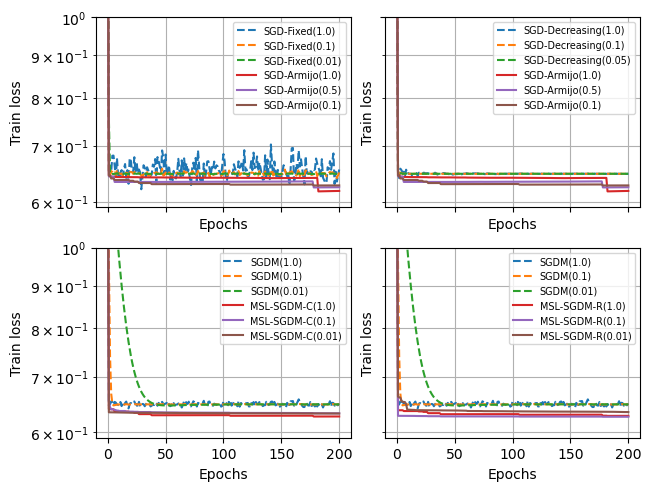

In [12]:
diagnostic(optim_data([sgdApple_fixed1, sgdApple_fixed2, sgdApple_fixed3, sgdApple_armijo1, sgdApple_armijo2, sgdApple_armijo3]),
           optim_data([sgdApple_decre1, sgdApple_decre2, sgdApple_decre3, sgdApple_armijo1, sgdApple_armijo2, sgdApple_armijo3]),
           optim_data([sgdmApple1, sgdmApple2, sgdmApple3, mslcApple1, mslcApple2, mslcApple3]),
           optim_data([sgdmApple1, sgdmApple2, sgdmApple3, mslrApple1, mslrApple2, mslrApple3]))

# Cars purchaising dataset

In [5]:
# SGD-Fixed
sgdCar_fixed1 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=1)
sgdCar_fixed2 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.1)
#sgdCar_fixed3 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.01)

In [6]:
# SGD-Decreasing
sgdCar_decre1 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=1)
sgdCar_decre2 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.1)
#sgdCar_decre3 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.01)

In [7]:
# SGD-Armijo
sgdCar_armijo1 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=1)
sgdCar_armijo2 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.1)
#sgdCar_armijo3 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.01)

In [8]:
# SGDM
sgdmCar_1 = LogisticRegression(solver="SGDM", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=1, momentum=0.9)
sgdmCar_2 = LogisticRegression(solver="SGDM", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.1, momentum=0.9)
#sgdmCar_3 = LogisticRegression(solver="SGDM", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.01, momentum=0.9)

In [9]:
# MSL-SGDM-C
mslcCar_1 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=1, momentum=0.9)
mslcCar_2 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.1, momentum=0.9)
#mslcCar_3 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.01, momentum=0.9)

In [10]:
# MSL-SGDM-R
mslrCar_1 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=1, momentum=0.9)
mslrCar_2 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.1, momentum=0.9)
#mslrCar_3 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16, epochs=200).fit(w0Car, X_train_car, y_train_car, X_test_car, y_test_car, step_size=0.01, momentum=0.9)

In [11]:
modelsCar_data = optim_data([sgdCar_fixed1, sgdCar_fixed2, sgdCar_decre1, sgdCar_decre2, sgdmCar_1, sgdmCar_2,
                             sgdCar_armijo1, sgdCar_armijo2, mslcCar_1, mslcCar_2, mslrCar_1, mslrCar_2])
#modelsCar_data[["Solver", "Loss"]].sort_values(by="Loss")

## Summary

In [12]:
models_summary(modelsCar_data, benchCar_data)

,Solver,C,Minibatch,Step-size,Momentum,Loss,Grad norm,Run-time,Iterations,Train accuracy,Test accuracy,Distance (L-BFGS)
0,L-BFGS,1,NaN,NaN,NaN,283.168161,3.693139e-02,NaN,7,0.826260,0.830688,0.000000
1,Newton-CG,1,NaN,NaN,NaN,283.168154,3.391424e-04,NaN,7,0.826260,0.830688,0.000361
2,CG,1,NaN,NaN,NaN,283.168154,3.493771e-07,NaN,11,0.826260,0.830688,0.000361
3,SGD-Fixed,1,16.0,1.0,0.0,452.476597,2.152100e+02,0.145917,200,0.822281,0.814815,2.326625
4,SGD-Fixed,1,16.0,0.1,0.0,448.757240,2.122943e+02,0.137108,200,0.830239,0.825397,2.307692
5,SGD-Decreasing,1,16.0,1.0,0.0,452.464604,2.154181e+02,0.139486,200,0.827586,0.814815,2.327639
6,SGD-Decreasing,1,16.0,0.1,0.0,452.473927,2.154157e+02,0.137277,200,0.828912,0.814815,2.327775
7,SGDM,1,16.0,1.0,0.9,450.492194,2.140365e+02,0.141599,200,0.826260,0.814815,2.315075
8,SGDM,1,16.0,0.1,0.9,452.530206,2.154549e+02,0.133193,200,0.831565,0.814815,2.328008
9,SGD-Armijo,1,16.0,1.0,0.0,411.727850,1.768008e+02,1.214562,200,0.769231,0.761905,2.081023


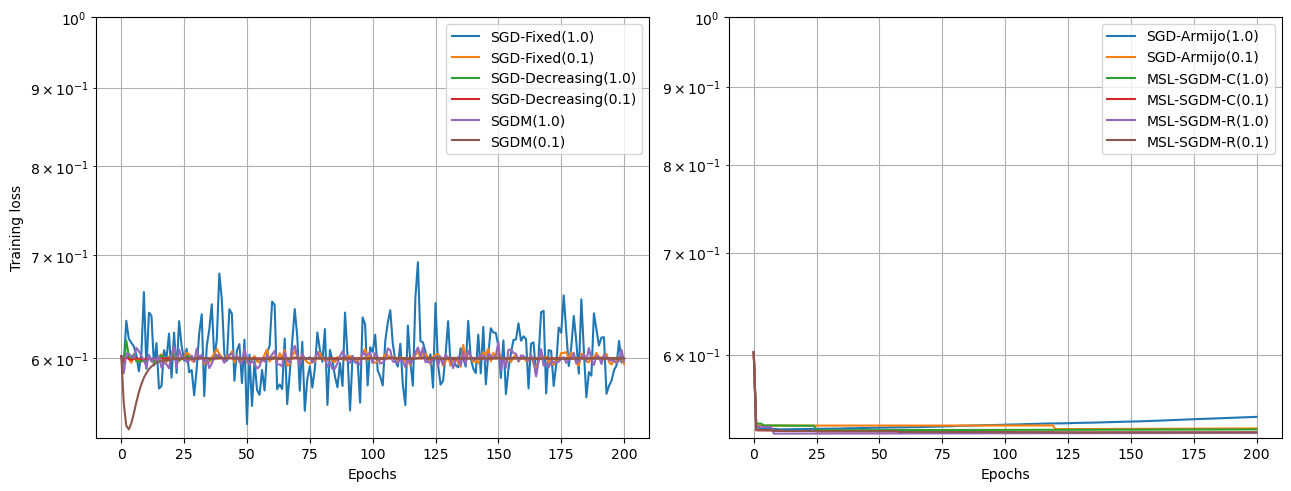

In [13]:
diagnostic(modelsCar_data)

# Loan eligibility dataset

In [7]:
# SGD-Fixed
sgdLoan_fixed1 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=1)
sgdLoan_fixed2 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.1)
#sgdLoan_fixed3 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.05)

In [8]:
# SGD-Decreasing
sgdLoan_decre1 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=1)
sgdLoan_decre2 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.1)
#sgdLoan_decre3 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.05)

In [9]:
# SGD-Armijo
sgdLoan_armijo1 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=1)
sgdLoan_armijo2 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.1)
#sgdLoan_armijo3 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.01)

In [10]:
# SGDM
sgdmLoan_1 = LogisticRegression(solver="SGDM", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=1, momentum=0.9)
sgdmLoan_2 = LogisticRegression(solver="SGDM", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.1, momentum=0.9)
#sgdmLoan_3 = LogisticRegression(solver="SGDM", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.05, momentum=0.9)

In [11]:
# MSL-SGDM-C
mslcLoan1 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=1, momentum=0.9)
mslcLoan2 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.1, momentum=0.9)
#mslcLoan3 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.01, momentum=0.9)

In [12]:
# MSL-SGDM-R
mslrLoan1 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=1, momentum=0.9)
mslrLoan2 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.1, momentum=0.9)
#mslrLoan3 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16, epochs=200).fit(w0Loan, X_train_loan, y_train_loan, X_test_loan, y_test_loan, step_size=0.01, momentum=0.9)

In [14]:
modelsLoan_data = optim_data([sgdLoan_fixed1, sgdLoan_fixed2, sgdLoan_decre1, sgdLoan_decre2, sgdmLoan_1, sgdmLoan_2,
                              sgdLoan_armijo1, sgdLoan_armijo2, mslcLoan1, mslcLoan2, mslrLoan1, mslrLoan2])

## Summary

In [15]:
models_summary(modelsLoan_data, benchLoan_data)

,Solver,C,Minibatch,Step-size,Momentum,Loss,Grad norm,Run-time,Iterations,Train accuracy,Test accuracy,Distance (L-BFGS)
0,L-BFGS,1,NaN,NaN,NaN,184.423165,0.095427,NaN,9,0.807292,0.822917,0.000000
1,Newton-CG,1,NaN,NaN,NaN,184.423039,0.000605,NaN,10,0.807292,0.822917,0.002784
2,CG,1,NaN,NaN,NaN,184.423039,0.000005,NaN,17,0.807292,0.822917,0.002784
3,SGD-Fixed,1,16.0,1.0,0.0,258.153415,113.842576,0.066524,200,0.630208,0.614583,1.425387
4,SGD-Fixed,1,16.0,0.1,0.0,238.841742,96.588691,0.078227,200,0.802083,0.822917,1.265440
5,SGD-Decreasing,1,16.0,1.0,0.0,238.701517,96.479555,0.079614,200,0.807292,0.822917,1.263853
6,SGD-Decreasing,1,16.0,0.1,0.0,238.717429,96.499784,0.078117,200,0.807292,0.822917,1.264035
7,SGDM,1,16.0,1.0,0.9,239.002304,96.830466,0.074383,200,0.807292,0.822917,1.268293
8,SGDM,1,16.0,0.1,0.9,238.899950,96.684848,0.066789,200,0.807292,0.822917,1.266231
9,SGD-Armijo,1,16.0,1.0,0.0,234.036775,91.732427,0.663431,200,0.807292,0.822917,1.212101


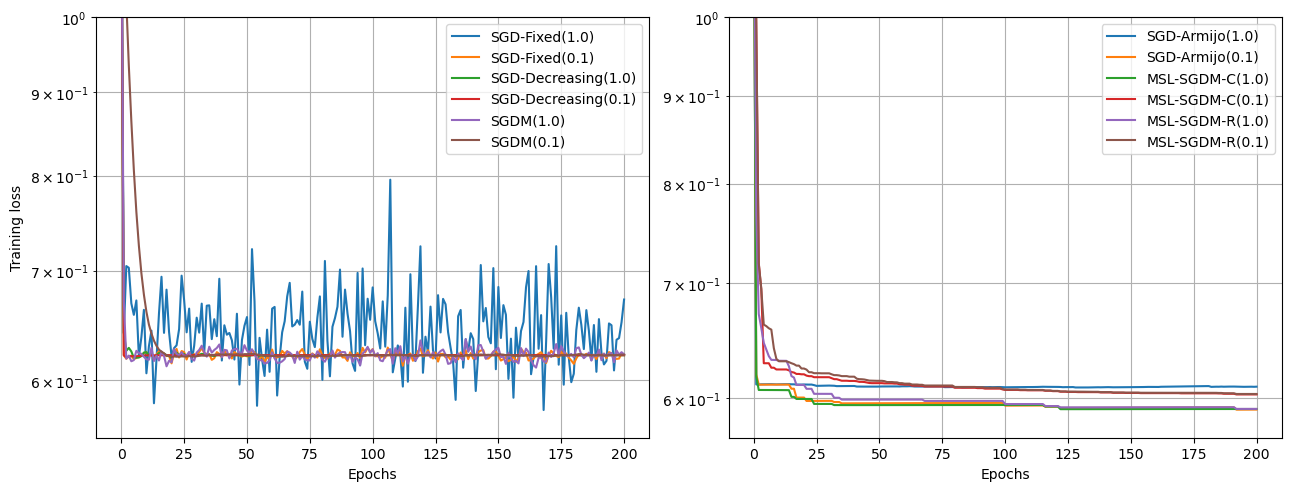

In [16]:
diagnostic(modelsLoan_data)

# HR score dataset

In [5]:
# SGD-Fixed
sgdHR_fixed1 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=1)
sgdHR_fixed2 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.1)
#sgdHR_fixed3 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.01)

In [6]:
# SGD-Decreasing
sgdHR_decre1 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=1)
sgdHR_decre2 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.1)
#sgdHR_decre3 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.01)

In [7]:
# SGDM
sgdmHR1 = LogisticRegression(solver="SGDM", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=1, momentum=0.9)
sgdmHR2 = LogisticRegression(solver="SGDM", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.1, momentum=0.9)
#sgdmHR3 = LogisticRegression(solver="SGDM", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.01, momentum=0.9)

In [8]:
# SGD-Armijo
sgdHR_armijo1 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=1)
sgdHR_armijo2 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.1)
#sgdHR_armijo3 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.01)

In [9]:
# MSL-SGDM-C
mslcHR1 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=1, momentum=0.9)
mslcHR2 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.1, momentum=0.9)
#mslcHR3 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.01, momentum=0.9)

In [10]:
# MSL-SGDM-R
mslrHR1 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=1, momentum=0.9)
mslrHR2 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.1, momentum=0.9)
#mslrHR3 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16, epochs=200).fit(w0HR, X_train_hr, y_train_hr, X_test_hr, y_test_hr, step_size=0.01, momentum=0.9)

In [11]:
modelsHR_data = optim_data([sgdHR_fixed1, sgdHR_fixed2, sgdHR_decre1, sgdHR_decre2, sgdmHR1, sgdmHR2,
                           sgdHR_armijo1, sgdHR_armijo2, mslcHR1, mslcHR2, mslrHR1, mslrHR2])

## Summary

In [13]:
models_summary(modelsHR_data, benchHR_data)

,Solver,C,Minibatch,Step-size,Momentum,Loss,Grad norm,Run-time,Iterations,Train accuracy,Test accuracy,Distance (L-BFGS)
0,L-BFGS,1,NaN,NaN,NaN,48.328602,0.017944,NaN,13,0.937500,0.916667,0.000000
1,Newton-CG,1,NaN,NaN,NaN,48.328557,0.000085,NaN,11,0.937500,0.916667,0.005638
2,CG,1,NaN,NaN,NaN,48.328557,0.000009,NaN,28,0.937500,0.916667,0.005638
3,SGD-Fixed,1,16.0,1.0,0.0,133.567185,183.413275,0.056833,200,0.916667,0.866667,3.006780
4,SGD-Fixed,1,16.0,0.1,0.0,99.817372,106.976068,0.041545,200,0.891667,0.850000,2.929043
5,SGD-Decreasing,1,16.0,1.0,0.0,97.181854,100.323570,0.053372,200,0.887500,0.850000,2.917590
6,SGD-Decreasing,1,16.0,0.1,0.0,97.161706,100.260975,0.048121,200,0.887500,0.850000,2.917675
7,SGDM,1,16.0,1.0,0.9,101.030892,109.814245,0.052331,200,0.891667,0.850000,2.937332
8,SGDM,1,16.0,0.1,0.9,97.106664,100.168118,0.042661,200,0.891667,0.850000,2.916804
9,SGD-Armijo,1,16.0,1.0,0.0,91.293756,86.421403,0.456052,200,0.887500,0.866667,2.849911


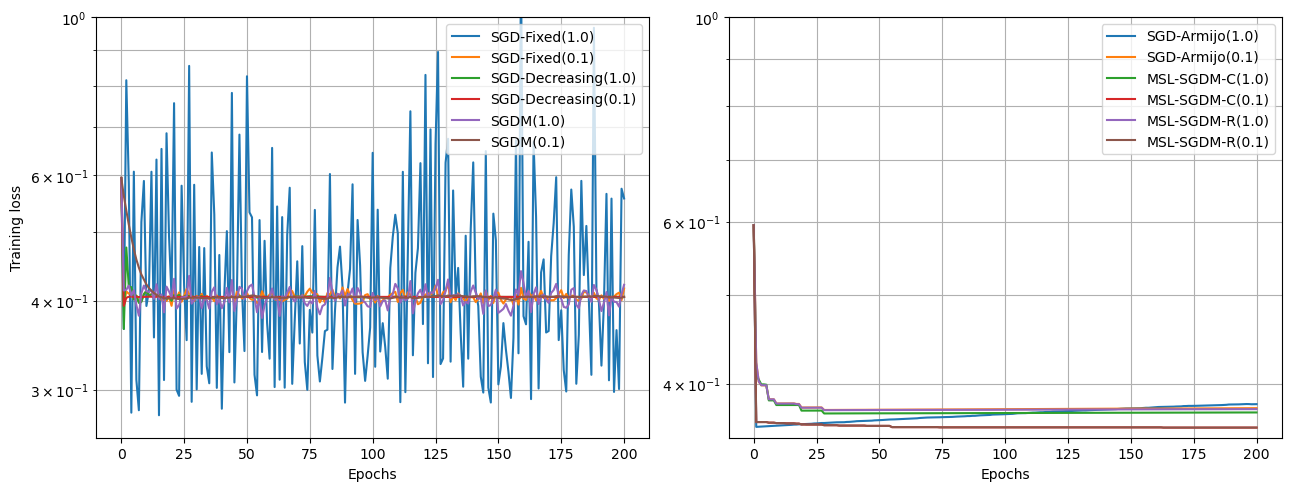

In [14]:
diagnostic(modelsHR_data)

# Bank churn dataset

In [5]:
X_train_bank.shape

(8000, 11)

In [5]:
# SGD-Fixed
sgdBank_fixed1 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=128).fit(w0Bank, X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=0.5)
sgdBank_fixed2 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=128).fit(w0Bank, X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=0.1)
sgdBank_fixed3 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=128).fit(w0Bank, X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=0.05)

In [6]:
# SGD-Decreasing
sgdBank_decre1 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=128).fit(w0Bank, X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=1)
sgdBank_decre2 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=128).fit(w0Bank, X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=0.5)
sgdBank_decre3 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=128).fit(w0Bank, X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=0.1)

In [7]:
# SGDM
sgdmBank1 = LogisticRegression(solver="SGDM", C=1, minibatch=128).fit(w0Bank, X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=0.5, momentum=0.9)
sgdmBank2 = LogisticRegression(solver="SGDM", C=1, minibatch=128).fit(w0Bank, X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=0.1, momentum=0.9)
sgdmBank3 = LogisticRegression(solver="SGDM", C=1, minibatch=128).fit(w0Bank, X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=0.05, momentum=0.9)

In [8]:
# SGD-Armijo
sgdBank_armijo1 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=128).fit(w0Bank, X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=1)
sgdBank_armijo2 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=128).fit(w0Bank, X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=0.5)
sgdBank_armijo3 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=128).fit(w0Bank, X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=0.1)

In [9]:
# MSL-SGDM-C
mslcBank1 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=128).fit(w0Bank, X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=1, momentum=0.9)
mslcBank2 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=128).fit(w0Bank, X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=0.5, momentum=0.9)
mslcBank3 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=128).fit(w0Bank, X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=0.1, momentum=0.9)

In [10]:
# MSL-SGDM-R
mslrBank1 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=128).fit(w0Bank, X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=1, momentum=0.9)
mslrBank2 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=128).fit(w0Bank, X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=0.5, momentum=0.9)
mslrBank3 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=128).fit(w0Bank, X_train_bank, y_train_bank, X_test_bank, y_test_bank, step_size=0.1, momentum=0.9)

In [11]:
modelsBank_data = optim_data([sgdBank_fixed1, sgdBank_fixed2, sgdBank_fixed3, sgdBank_decre1, sgdBank_decre2, sgdBank_decre3, sgdmBank1, sgdmBank2, sgdmBank3,
                              sgdBank_armijo1, sgdBank_armijo2, sgdBank_armijo3, mslcBank1, mslcBank2, mslcBank3, mslrBank1, mslrBank2, mslrBank3])

## Summary

In [12]:
models_summary(modelsBank_data, benchBank_data)

,Solver,C,Minibatch,Step-size,Momentum,Loss,Grad norm,Run-time,Iterations,Train accuracy,Test accuracy,Distance (L-BFGS)
0,L-BFGS,1,NaN,NaN,NaN,3504.989121,1.674165,NaN,10,0.806875,0.8155,0.000000
1,Newton-CG,1,NaN,NaN,NaN,3504.987491,0.001896,NaN,11,0.807250,0.8155,0.002066
2,CG,1,NaN,NaN,NaN,3504.987491,0.000016,NaN,15,0.807250,0.8155,0.002066
3,SGD-Fixed,1,128.0,0.50,0.0,4882.226402,2078.320631,0.741773,200,0.794375,0.8025,1.634078
4,SGD-Fixed,1,128.0,0.10,0.0,4929.323250,2124.646717,0.733485,200,0.798375,0.8035,1.650320
5,SGD-Fixed,1,128.0,0.05,0.0,4928.479498,2124.297242,0.738019,200,0.798125,0.8035,1.648993
6,SGD-Decreasing,1,128.0,1.00,0.0,4917.979485,2114.266595,0.738844,200,0.799250,0.8020,1.643766
7,SGD-Decreasing,1,128.0,0.50,0.0,4917.631554,2113.933405,0.745227,200,0.799250,0.8025,1.643563
8,SGD-Decreasing,1,128.0,0.10,0.0,4917.524027,2113.824867,0.733329,200,0.799125,0.8025,1.643555
9,SGDM,1,128.0,0.50,0.9,4920.679789,2116.676820,0.725595,200,0.797875,0.8020,1.645541


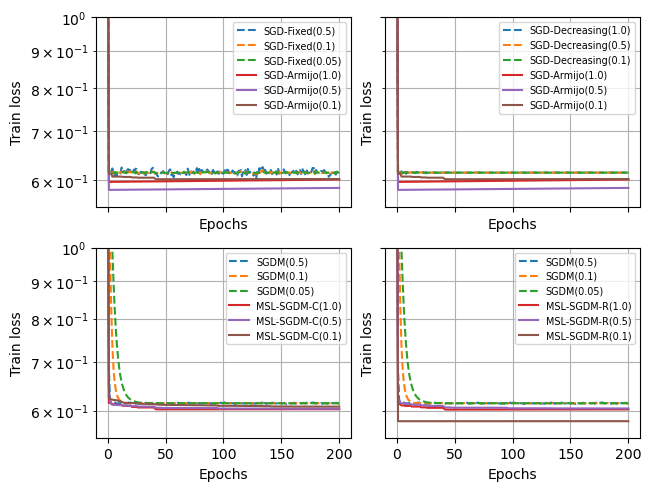

In [13]:
diagnostic(optim_data([sgdBank_fixed1, sgdBank_fixed2, sgdBank_fixed3, sgdBank_armijo1, sgdBank_armijo2, sgdBank_armijo3]),
           optim_data([sgdBank_decre1, sgdBank_decre2, sgdBank_decre3, sgdBank_armijo1, sgdBank_armijo2, sgdBank_armijo3]),
           optim_data([sgdmBank1, sgdmBank2, sgdmBank3, mslcBank1, mslcBank2, mslcBank3]),
           optim_data([sgdmBank1, sgdmBank2, sgdmBank3, mslrBank1, mslrBank2, mslrBank3]))

# Breast cancer dataset

In [6]:
# SGD-Fixed
sgdBreast_fixed1 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=1)
sgdBreast_fixed2 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.1)
#sgdBreast_fixed3 = LogisticRegression(solver="SGD-Fixed", C=0.01, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.01)

In [7]:
# SGD-Decreasing
sgdBreast_decre1 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=1)
sgdBreast_decre2 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.1)
#sgdBreast_decre3 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.001)

In [8]:
# SGD-Armijo
sgdBreast_armijo1 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=1)
sgdBreast_armijo2 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.1)
#sgdBreast_armijo3 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.01)

In [9]:
# SGDM
sgdmBreast_1 = LogisticRegression(solver="SGDM", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=1, momentum=0.9)
sgdmBreast_2 = LogisticRegression(solver="SGDM", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.1, momentum=0.9)
#sgdmBreast_3 = LogisticRegression(solver="SGDM", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.01, momentum=0.9)

In [10]:
# MSL-SGDM-C
mslcBreast_1 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=1, momentum=0.9)
mslcBreast_2 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.1, momentum=0.9)
#mslcBreast_3 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.01, momentum=0.9)

In [11]:
# MSL-SGDM-R
mslrBreast_1 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=1, momentum=0.9)
mslrBreast_2 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.1, momentum=0.9)
#mslrBreast_3 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16, epochs=200).fit(w0Breast, X_train_breast, y_train_breast, X_test_breast, y_test_breast, step_size=0.01, momentum=0.9)

In [12]:
modelsBreast_data = optim_data([sgdBreast_fixed1, sgdBreast_fixed2, sgdBreast_decre1, sgdBreast_decre2, sgdmBreast_1, sgdmBreast_2,
                                sgdBreast_armijo1, sgdBreast_armijo2, mslcBreast_1, mslcBreast_2, mslrBreast_1, mslrBreast_2])

## Summary

In [13]:
models_summary(modelsBreast_data, benchBreast_data)

,Solver,C,Minibatch,Step-size,Momentum,Loss,Grad norm,Run-time,Iterations,Train accuracy,Test accuracy,Distance (L-BFGS)
0,L-BFGS,1,NaN,NaN,NaN,206.613346,0.066685,NaN,12,0.362637,0.412281,0.000000
1,Newton-CG,1,NaN,NaN,NaN,206.612102,0.001591,NaN,84,0.362637,0.412281,0.043543
2,CG,1,NaN,NaN,NaN,206.612101,0.000019,NaN,29,0.362637,0.412281,0.043966
3,SGD-Fixed,1,16.0,1.0,0.0,236.550904,51.009914,0.098075,200,0.331868,0.377193,2.309363
4,SGD-Fixed,1,16.0,0.1,0.0,257.746997,133.376380,0.093845,200,0.353846,0.403509,2.399727
5,SGD-Decreasing,1,16.0,1.0,0.0,256.000909,126.977465,0.092926,200,0.353846,0.403509,2.393119
6,SGD-Decreasing,1,16.0,0.1,0.0,255.948368,126.768624,0.081383,200,0.353846,0.403509,2.393020
7,SGDM,1,16.0,1.0,0.9,258.998525,137.433680,0.085420,200,0.351648,0.403509,2.405013
8,SGDM,1,16.0,0.1,0.9,256.196994,127.588188,0.099238,200,0.353846,0.403509,2.394087
9,SGD-Armijo,1,16.0,1.0,0.0,248.767734,104.719958,0.787926,200,0.345055,0.394737,2.325881


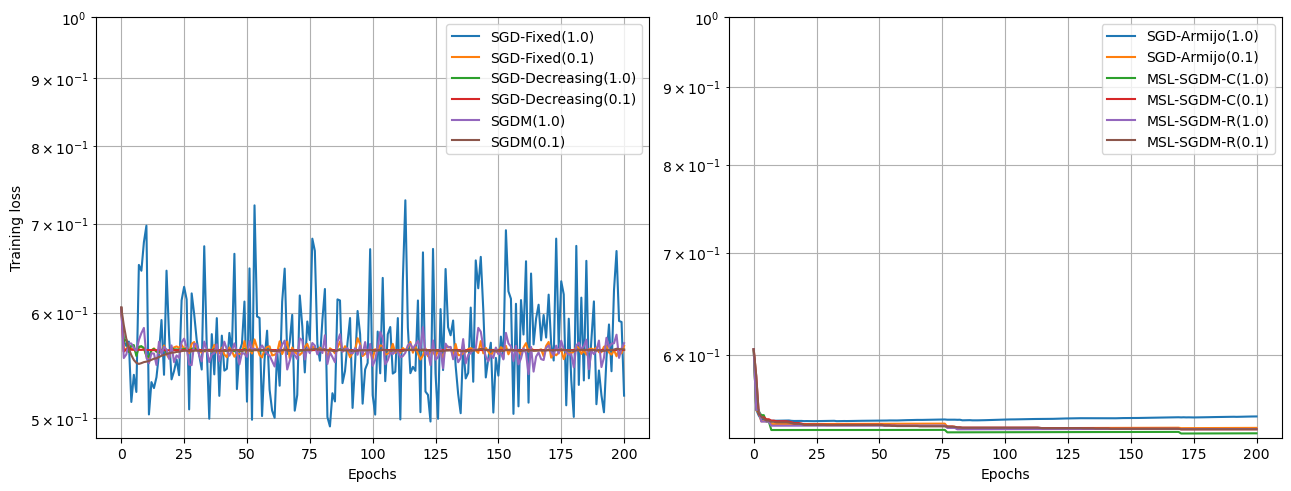

In [14]:
diagnostic(modelsBreast_data)

# Heart attack dataset

In [5]:
sgdHeart_fixed1 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=16).fit(w0Heart, X_train_heart, y_train_heart, X_test_heart, y_test_heart, step_size=0.5)
sgdHeart_fixed2 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=16).fit(w0Heart, X_train_heart, y_train_heart, X_test_heart, y_test_heart, step_size=0.1)

In [6]:
sgdHeart_decre1 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16).fit(w0Heart, X_train_heart, y_train_heart, X_test_heart, y_test_heart, step_size=1)
sgdHeart_decre2 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16).fit(w0Heart, X_train_heart, y_train_heart, X_test_heart, y_test_heart, step_size=0.1)

In [7]:
sgdmHeart1 = LogisticRegression(solver="SGDM", C=1, minibatch=16).fit(w0Heart, X_train_heart, y_train_heart, X_test_heart, y_test_heart, step_size=1, momentum=0.9)
sgdmHeart2 = LogisticRegression(solver="SGDM", C=1, minibatch=16).fit(w0Heart, X_train_heart, y_train_heart, X_test_heart, y_test_heart, step_size=0.1, momentum=0.9)

In [8]:
sgdHeart_armijo1 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16).fit(w0Heart, X_train_heart, y_train_heart, X_test_heart, y_test_heart, step_size=1)
sgdHeart_armijo2 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16).fit(w0Heart, X_train_heart, y_train_heart, X_test_heart, y_test_heart, step_size=0.1)

In [9]:
mslcHeart1 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16).fit(w0Heart, X_train_heart, y_train_heart, X_test_heart, y_test_heart, step_size=1, momentum=0.9)
mslcHeart2 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16).fit(w0Heart, X_train_heart, y_train_heart, X_test_heart, y_test_heart, step_size=0.1, momentum=0.9)

In [10]:
mslrHeart1 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16).fit(w0Heart, X_train_heart, y_train_heart, X_test_heart, y_test_heart, step_size=1, momentum=0.9)
mslrHeart2 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16).fit(w0Heart, X_train_heart, y_train_heart, X_test_heart, y_test_heart, step_size=0.1, momentum=0.9)

In [11]:
modelsHeart_data = optim_data([sgdHeart_fixed1, sgdHeart_fixed2, sgdHeart_decre1, sgdHeart_decre2, sgdmHeart1, sgdmHeart2,
                               sgdHeart_armijo1, sgdHeart_armijo2, mslcHeart1, mslcHeart2, mslrHeart1, mslrHeart2])

## Summary

In [12]:
models_summary(modelsHeart_data, benchHeart_data)

,Solver,C,Minibatch,Step-size,Momentum,Loss,Grad norm,Run-time,Iterations,Train accuracy,Test accuracy,Distance (L-BFGS)
0,L-BFGS,1,NaN,NaN,NaN,85.677288,0.039044,NaN,11,0.858921,0.836066,0.000000
1,Newton-CG,1,NaN,NaN,NaN,85.677227,0.000266,NaN,13,0.858921,0.836066,0.003460
2,CG,1,NaN,NaN,NaN,85.677227,0.000011,NaN,16,0.858921,0.836066,0.003460
3,SGD-Fixed,1,16.0,0.5,0.0,132.476606,87.361653,0.075905,200,0.796680,0.836066,1.616269
4,SGD-Fixed,1,16.0,0.1,0.0,129.170861,84.296287,0.046981,200,0.842324,0.852459,1.548467
5,SGD-Decreasing,1,16.0,1.0,0.0,128.938804,84.123854,0.053865,200,0.846473,0.852459,1.543830
6,SGD-Decreasing,1,16.0,0.1,0.0,128.947292,84.138969,0.049163,200,0.846473,0.852459,1.543949
7,SGDM,1,16.0,1.0,0.9,128.649439,82.518420,0.050621,200,0.804979,0.852459,1.555164
8,SGDM,1,16.0,0.1,0.9,128.708099,83.644211,0.043816,200,0.850622,0.852459,1.542228
9,SGD-Armijo,1,16.0,1.0,0.0,118.593886,69.802355,0.472576,200,0.792531,0.819672,1.353019


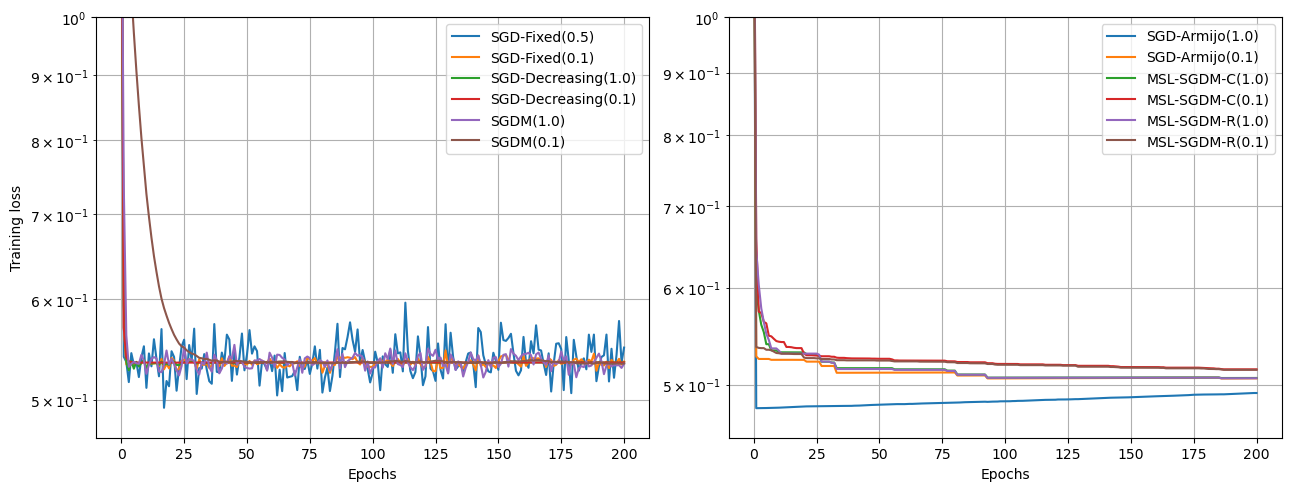

In [13]:
diagnostic(modelsHeart_data)

# Diabetes dataset

In [5]:
X_train_diab.shape

(595, 9)

In [6]:
sgdDiab_fixed1 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=16).fit(w0Diab, X_train_diab, y_train_diab, X_test_diab, y_test_diab, step_size=1)
sgdDiab_fixed2 = LogisticRegression(solver="SGD-Fixed", C=1, minibatch=16).fit(w0Diab, X_train_diab, y_train_diab, X_test_diab, y_test_diab, step_size=0.1)

In [7]:
sgdDiab_decre1 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16).fit(w0Diab, X_train_diab, y_train_diab, X_test_diab, y_test_diab, step_size=1)
sgdDiab_decre2 = LogisticRegression(solver="SGD-Decreasing", C=1, minibatch=16).fit(w0Diab, X_train_diab, y_train_diab, X_test_diab, y_test_diab, step_size=0.1)

In [8]:
sgdmDiab1 = LogisticRegression(solver="SGDM", C=1, minibatch=16).fit(w0Diab, X_train_diab, y_train_diab, X_test_diab, y_test_diab, step_size=1, momentum=0.9)
sgdmDiab2 = LogisticRegression(solver="SGDM", C=1, minibatch=16).fit(w0Diab, X_train_diab, y_train_diab, X_test_diab, y_test_diab, step_size=0.1, momentum=0.9)

In [9]:
sgdDiab_armijo1 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16).fit(w0Diab, X_train_diab, y_train_diab, X_test_diab, y_test_diab, step_size=1)
sgdDiab_armijo2 = LogisticRegression(solver="SGD-Armijo", C=1, minibatch=16).fit(w0Diab, X_train_diab, y_train_diab, X_test_diab, y_test_diab, step_size=0.1)

In [10]:
mslcDiab1 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16).fit(w0Diab, X_train_diab, y_train_diab, X_test_diab, y_test_diab, step_size=1, momentum=0.9)
mslcDiab2 = LogisticRegression(solver="MSL-SGDM-C", C=1, minibatch=16).fit(w0Diab, X_train_diab, y_train_diab, X_test_diab, y_test_diab, step_size=0.1, momentum=0.9)

In [11]:
mslrDiab1 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16).fit(w0Diab, X_train_diab, y_train_diab, X_test_diab, y_test_diab, step_size=1, momentum=0.9)
mslrDiab2 = LogisticRegression(solver="MSL-SGDM-R", C=1, minibatch=16).fit(w0Diab, X_train_diab, y_train_diab, X_test_diab, y_test_diab, step_size=0.1, momentum=0.9)

In [12]:
modelsDiab_data = optim_data([sgdDiab_fixed1, sgdDiab_fixed2, sgdDiab_decre1, sgdDiab_decre2, sgdmDiab1, sgdmDiab2,
                              sgdDiab_armijo1, sgdDiab_armijo2, mslcDiab1, mslcDiab2, mslrDiab1, mslrDiab2])

## Sumary

In [13]:
models_summary(modelsDiab_data, benchDiab_data)

,Solver,C,Minibatch,Step-size,Momentum,Loss,Grad norm,Run-time,Iterations,Train accuracy,Test accuracy,Distance (L-BFGS)
0,L-BFGS,1,NaN,NaN,NaN,284.811958,0.151358,NaN,8,0.773109,0.778523,0.000000
1,Newton-CG,1,NaN,NaN,NaN,284.811835,0.003936,NaN,10,0.773109,0.778523,0.001965
2,CG,1,NaN,NaN,NaN,284.811835,0.000002,NaN,17,0.773109,0.778523,0.001965
3,SGD-Fixed,1,16.0,1.0,0.0,400.135948,204.997546,0.105756,200,0.625210,0.550336,1.535070
4,SGD-Fixed,1,16.0,0.1,0.0,367.388511,150.410983,0.112317,200,0.747899,0.731544,1.440880
5,SGD-Decreasing,1,16.0,1.0,0.0,367.028662,151.377138,0.116299,200,0.752941,0.731544,1.432679
6,SGD-Decreasing,1,16.0,0.1,0.0,366.993957,151.336826,0.118838,200,0.752941,0.731544,1.432392
7,SGDM,1,16.0,1.0,0.9,367.112094,152.359449,0.135002,200,0.744538,0.758389,1.433070
8,SGDM,1,16.0,0.1,0.9,367.032826,151.544042,0.111731,200,0.752941,0.731544,1.432040
9,SGD-Armijo,1,16.0,1.0,0.0,351.616965,131.138183,1.007607,200,0.744538,0.731544,1.331100


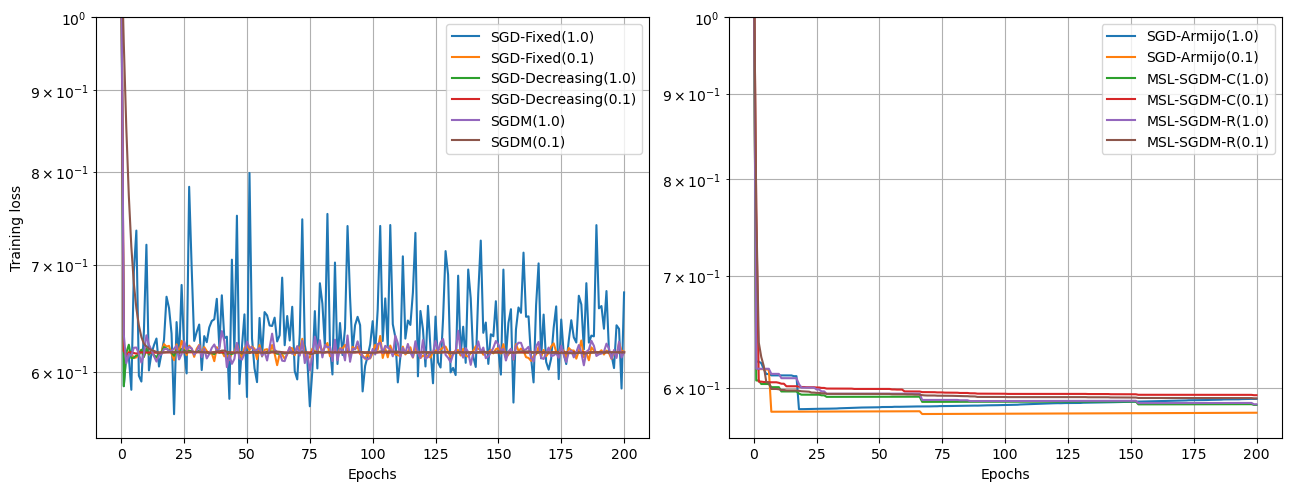

In [14]:
diagnostic(modelsDiab_data)